<a href="https://colab.research.google.com/github/svanlinden/test/blob/master/simpsons_opl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

The Simpsons Revisited
-----------------------

We willen het geslacht van een Simpson kunnen voorspellen m.b.v. een neuraal netwerk (cfr. hoofdstuk Beslissingsbomen uit Data Science 1). Deze dataset is erg klein en daarom kunnen we geen validatie-set of test-set construeren.

a) Lees de dataset van de Simpsons in

In [ ]:
simpsons = pd.read_csv('../datasets/simpsons_orig.csv',sep=";", index_col=0)

b) Wat voor soort voorspelling trachten we hier te doen? Regressie of classificatie?

In [ ]:
## Een classificatie

c) Bepaal welke kolommen we niet kunnen gebruiken bij deze voorspelling?

In [ ]:
print(simpsons.head())
print(simpsons.iloc[:,2:5].head())
simpsons.info()

      Naam  Haarlengte  Gewicht  Leeftijd Geslacht
ID                                                
1    Homer           0      250        36        M
2    Marge          10      150        34        V
3     Bart           2       90        10        M
4     Lisa           6       78         8        V
5   Maggie           4       20         1        V
    Gewicht  Leeftijd Geslacht
ID                            
1       250        36        M
2       150        34        V
3        90        10        M
4        78         8        V
5        20         1        V
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Naam        9 non-null      object
 1   Haarlengte  9 non-null      int64 
 2   Gewicht     9 non-null      int64 
 3   Leeftijd    9 non-null      int64 
 4   Geslacht    9 non-null      object
dtypes: int64(3), object(2)
memory usage: 432.

d) Maak nu een input training-set X_train en normaliseer deze. Doe hetzelfde voor de targetkolom: maak hier een numerieke binaire targetvector y_train van.

In [ ]:
from tensorflow import keras

X_train = simpsons.iloc[:,1:4]
y_train = simpsons.Geslacht.replace({'M':0, 'V':1})
# pd.get_dummies(simpsons.Geslacht,drop_first=True)

e) Maak een neuraal netwerk met de correcte inputs en outputs. Denk na over welke activatiefuncties je nodig zal hebben.  Let op: niet alle activatiefuncties zijn gepast.

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


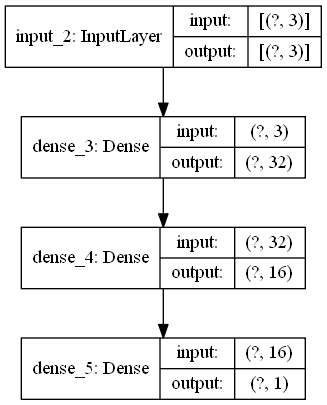

In [ ]:
import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(False)
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from IPython.core.display import Image

inputs = Input(shape=(3,))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.summary()
keras.utils.plot_model(model,to_file='images/oefening1.png', show_shapes=True)
Image('images/oefening1.png')

f) Compileer je model.
* Welke kostenfunctie (loss) zal je hier gebruiken. Zoek eventueel de <a href="https://keras.io/api/losses/">beschikbare kostenfunctie</a> op.
* Welke optimizer(s) ga je gebruiken? Zoek eventueel op welke de <a href="https://keras.io/api/optimizers/">beschikbare zijn</a> en experimenteer.
* Welke <a href="https://keras.io/api/metrics/">metric</a> ga je gebruiken?

In [ ]:
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Nadam(),
    metrics=["accuracy"],
)

g) Train je neuraal netwerk en bekijk via “<a href="https://pypi.org/project/livelossplot/">PlotLossesKeras”</a> de resultaten.
* Hoeveel epochs ga je gebruiken. Experimenteer hiermee.
* Welke batch size? Idem.

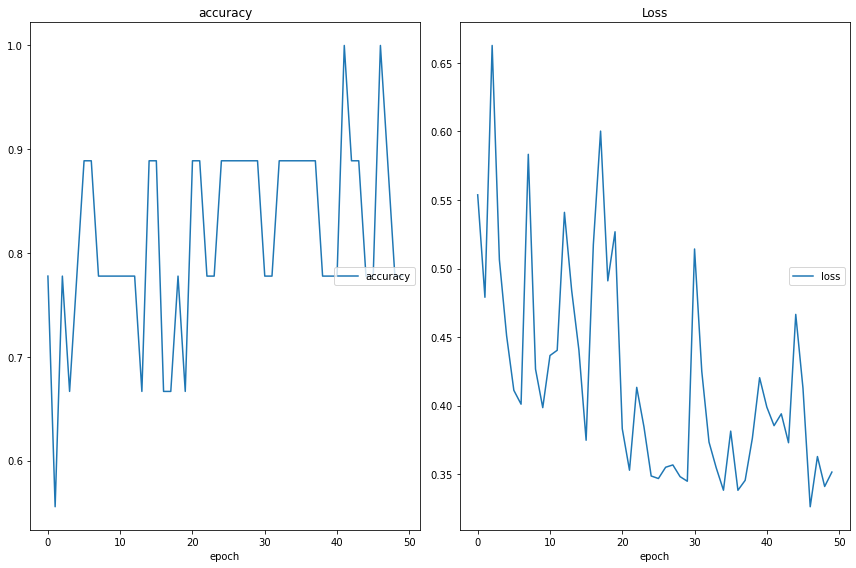

accuracy
	accuracy         	 (min:    0.556, max:    1.000, cur:    0.778)
Loss
	loss             	 (min:    0.326, max:    0.663, cur:    0.352)


In [ ]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train,
                    batch_size=5, epochs=50,
                    callbacks=[PlotLossesKeras()],
                    verbose=False)








j) Test de kwaliteit van je neurale netwerk
* Evalueer je model met de <code>evaluate</code>-methode
* Gebruik je neuraal netwerk om het geslacht van je X_train voorspellen. Komen ze overeen met de targets?
* Voorspel ook het geslacht van de onbekende Simpson. Komt dit overeen met de voorspelling die je gemaakt werd bij beslissingsbomen?

In [ ]:
model.evaluate(X_train, y_train)
# voorspelling voor Comic Guy - haarlengte: 8, gewicht: 290, leeftijd: 38
comic_guy = np.array([8, 290, 38]).reshape(-1,3)
mole_man = np.array([4.4, 140, 31]).reshape(-1,3)
print(model.predict(comic_guy))
print(model.predict(mole_man))

k) Bewaar je getrainde model in bestand simpsons.h5.

In [ ]:
model.save('simpsons')

Bewaar resultaten voor Evaluatiemetrieken

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
df = pd.DataFrame(zip(y_train,y_pred.flatten()), columns=['y_true','y_score'])
df.to_csv('../datasets/simpsons_roc1.csv', index=False)